<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS09_TG19_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS09 - Regression

# Lab 0
Generating Training Data

In this laboratory exercise, we will experiment with three different strategies for creating training, validation, and test datasets. The data utilized are Titanic ship records for which we have already extracted features in a previous practical session.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset : /content/drive/MyDrive/dataset/Titanic-Dataset-selected.csv

## Random Split



### Step 1 - Load Data

In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


### Step 2 - Split Data

The results are as follows,

In [6]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split again between validation and testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Check the respective dataset sizes

print(f'Original data count: {df.shape[0]}')
print(f'Training data count: {df_train.shape[0]}')
print(f'Validation data count: {df_val.shape[0]}')
print(f'Test data count: {df_test.shape[0]}')

# Check the ratio of each label
print('=========')
print(f'Original label counts:\n{df.Survived.value_counts()}')
print(f'Training label counts:\n{df_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df_val.Survived.value_counts()}')
print(f'Test label counts:\n{df_test.Survived.value_counts()}')

Original data count: 891
Training data count: 712
Validation data count: 89
Test data count: 90
Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    53
1    36
Name: count, dtype: int64
Test label counts:
Survived
0    57
1    33
Name: count, dtype: int64


## Stratified Split

### Step 1 - Load Data

In [7]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


### Step 2 - Split Data

The results are as follows. Observe the resulting proportions.

In [8]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split again between validation and testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Check the respective dataset sizes

print(f'Original label counts:\n{df2.Survived.value_counts()}')
print(f'Training label counts:\n{df2_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df2_val.Survived.value_counts()}')
print(f'Test label counts:\n{df2_test.Survived.value_counts()}')

Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    51
1    38
Name: count, dtype: int64
Test label counts:
Survived
0    59
1    31
Name: count, dtype: int64


## Cross Validation 1

In this practical exercise, we will create only training and test datasets using the cross-validation method.

### Step 1 - Load Data

In [9]:
import pandas as pd

df3 = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


### Step 2 - Split Data

Observe the index numbers for each fold. If successful, each fold should have different index numbers for training and test data.

The following are the results for the first two folds.

In [10]:
# Implementation of k-fold cross-validation (random) with training and testing only
from sklearn.model_selection import KFold

# initialize the kfold object
kf = KFold(n_splits=4)
print(f'Number of folds: {kf.get_n_splits()}')
print(f'KFold object: {kf}')

# Perform splitting with KFold
kf_split = kf.split(df3)
print(f'Number of rows in df: {df.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df: 891
Train index: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438


## Cross Validation 2

In this laboratory exercise, we adopt an approach that differs slightly from the previous practical session. First, the data will be split into training and test sets. Then, the training data will be partitioned into several segments using cross-validation for the purposes of training and validation.

### Step 1 - Load Data

In [11]:
import pandas as pd

df4 = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


### Step 2 - Split Data

As a result, the size of the training data should be reduced because it was split in the initial stage. The following are the results for the first two folds.

In [12]:
# Implementation of k-fold cross-validation (random) with training, validation, and testing data
from sklearn.model_selection import train_test_split, KFold

# First split between training and testing data using train_test_split
# 8:2 ratio for training and testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# initialize the kfold object
kf2 = KFold(n_splits=4)
print(f'Number of folds: {kf2.get_n_splits()}')
print(f'KFold object: {kf2}')

# Perform splitting with KFold for the training dataframe
# With this procedure, we still retain testing data for model evaluation
# while nevertheless being able to perform evaluation using validation data
kf2_split = kf2.split(df_train)
print(f'Number of rows in df_train: {df4_train.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf2_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df_train: 712
Train index: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 39

# Lab 1

/content/drive/MyDrive/dataset/dataset.csv

⬆️ Download the Dataset First ⬆️
The following are the steps accompanied by concise explanations and Python code snapshots to conduct a linear regression practicum, referring to the previously provided code:



### Step 1: Data Preparation

Download and place the data file to be used in the same directory. Ensure the data is saved in CSV format.

### Step 2: Import Libraries

In [18]:
# import package
import numpy as np
import pandas as pd

### Step 3: Read the Data


Read data from the CSV file using Pandas.

In [19]:
# read data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/dataset.csv')

### Step 4: Understanding the Data

In [20]:
# view some initial data
data.head()

# check data dimensions
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462



Display some initial records, the data dimensions, data information, and statistical descriptions to understand the characteristics of the data.

### Step 5: Data Visualization

In [21]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


- Import the Matplotlib and Seaborn libraries for data visualization.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


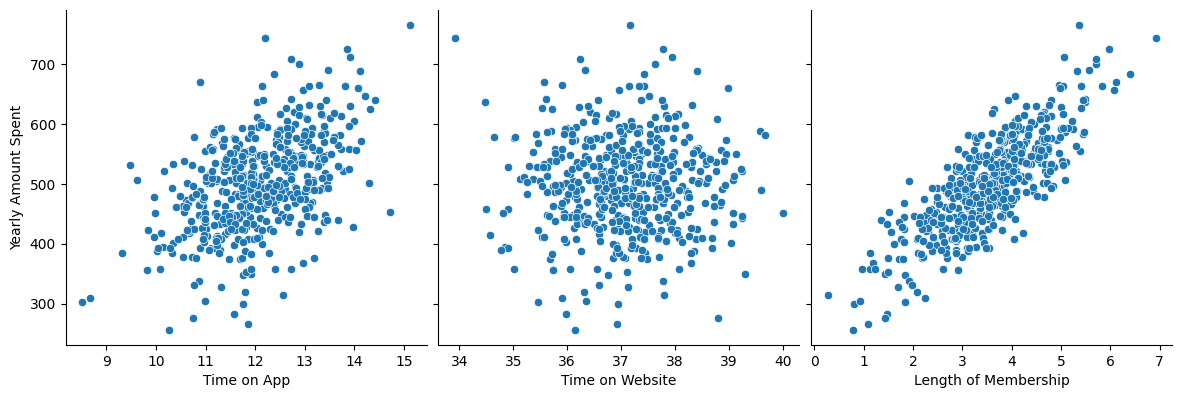

In [22]:
# visualize data with pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()


- Use a pairplot to display relationships between independent variables and the target variable in scatter plot form.

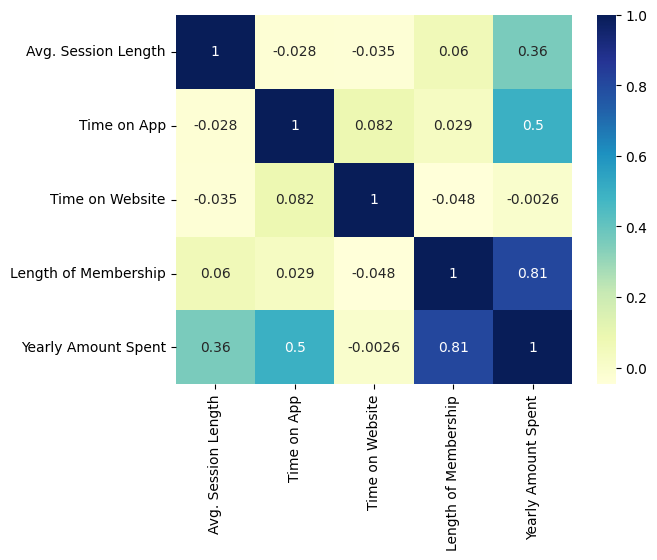

In [23]:
# visualize correlation with heatmap
# Select only numeric columns for correlation calculation
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Use a heatmap to display the correlation matrix among variables in the dataset. Higher values indicate stronger correlation.

### Step 6: Linear Regression

In [24]:
# Create independent variable X and Y, example selection from prior correlation analysis
X = data['Length of Membership']
y = data['Yearly Amount Spent']


- Separate the independent variable (X) and the target variable (y).

In [25]:
# Split training and test data with a 7:3 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- Split the data into training data (70%) and test data (30%) using train_test_split.

- Train the linear regression model using the StatsModels library. Add a constant (intercept) to the independent variable.

In [26]:
# Model training
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


- Visualize the regression line on the training data.

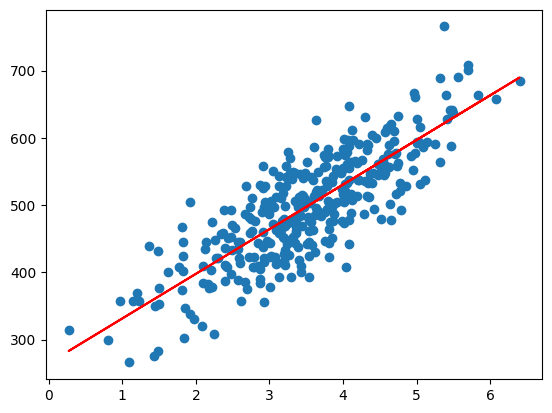

In [27]:
# Visualization of regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Step 7: Residual Analysis

In [28]:
# Predict y_value from the trained x data
y_train_pred = lr.predict(X_train_sm)

# Calculating residuals
res = (y_train - y_train_pred)

- Make predictions for y on the training data and compute residuals (the differences between actual and predicted values).

/tmp/ipython-input-4216909171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


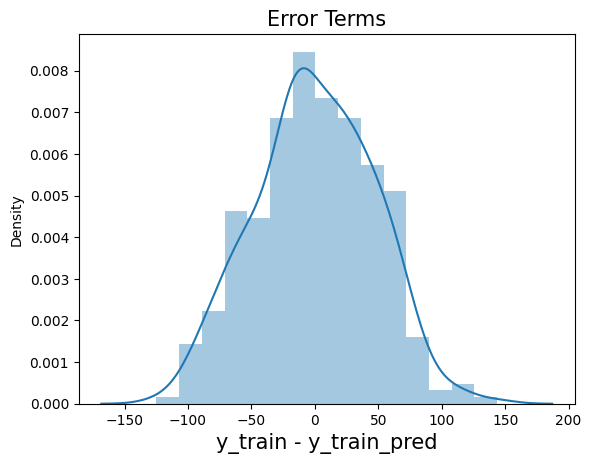

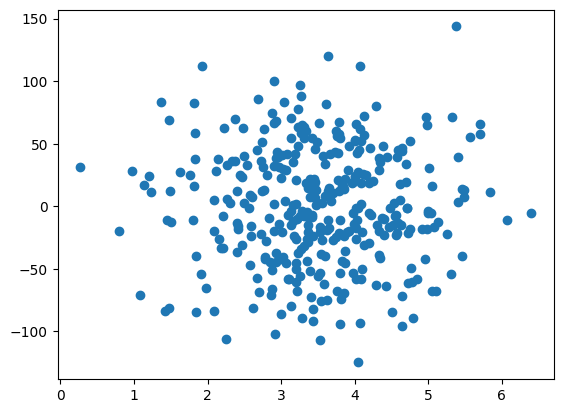

In [29]:
# Residual histogram
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Residual scatter plot
plt.scatter(X_train, res)
plt.show()


- Visualize residuals as a histogram and scatter plot to evaluate the distribution and error patterns.

### Step 8: Prediction on Test Data and Model Evaluation

In [30]:
# Prediction on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)


- Perform predictions on the test data.

In [31]:
# Compute R-squared value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)


- Compute the R-squared value to assess model performance on the test data.

### Step 9: Visualization of Results

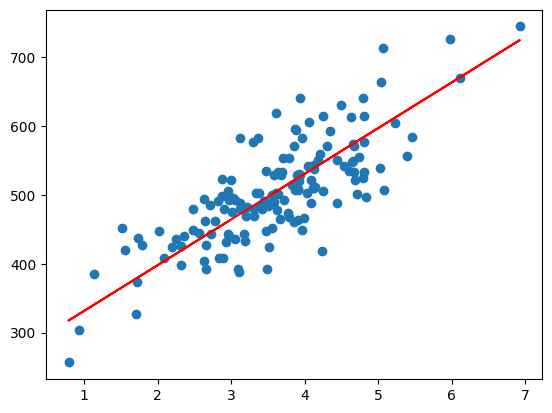

In [32]:
# Visualize test data and prediction results
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()


- Visualize the test data and prediction results in a scatter plot.

By following the steps above, you can perform linear regression analysis on your data, measure model performance, and visualize the results.

# Lab 2

/content/drive/MyDrive/dataset/Posisi_gaji.csv

⬆️ Download the Dataset First ⬆️

### Step 1 - Import Libraries

First, import the necessary libraries, including NumPy, Matplotlib, and pandas.

In [33]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 2 - Load the Dataset

Make sure you have downloaded the CSV file 'Posisi_gaji.csv' and placed it in the same directory. This is the dataset that will be used in this lab exercise.

Reading the dataset using pd.read_csv and selecting the features (independent variable X) and the target (dependent variable y).

In [34]:
# Importing the dataset (Ensure you have the CSV file 'Posisi_gaji.csv' in the same directory)
dataset = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Change to a single column only

### Step 3 - Feature Scaling

Use StandardScaler to perform feature scaling X and the target y. This is necessary because SVM is highly sensitive to the scale of the data.

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Step 4 - Fitting the SVR Model

Create the SVR model with the RBF (Radial Basis Function) kernel and train it with the scaled data.

In [36]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Step 5 - Visualizing SVR Results

As the next step, perform visualization using plots to visualize the SVR model's prediction results. This includes plotting the original data points (red dots) and the predicted curve (blue line) across varying position levels.

/tmp/ipython-input-3243201412.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


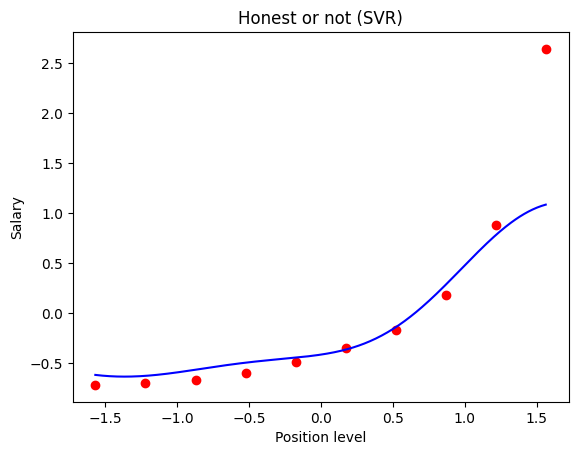

In [37]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Honest or not (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Step 6 - Predicting Results

- Create a 2D array containing the position level to be predicted. In this example, the position level is 6.5.

- Scale the prediction feature using sc_X.transform.

- Perform the prediction using the trained SVR model.

- Return the predicted result to the original scale using sc_y.inverse_transform.

In [38]:
# Predicting the result
# Create a 2D array containing the position level to be predicted
position_level_to_predict = np.array([[6.5]])
# Feature scaling for the data to be predicted
position_level_to_predict = sc_X.transform(position_level_to_predict)
# Perform prediction using the SVR model
predicted_salary = regressor.predict(position_level_to_predict)
# Return the predicted result to the original scale
predicted_salary = sc_y.inverse_transform(predicted_salary.reshape(-1, 1))

### Step 7 - Displaying Results

Display the predicted salary result for position level 6.5 in the code

In [39]:
# Displaying the predicted result
print("Predicted Salary for Position Level 6.5:", predicted_salary[0])

Predicted Salary for Position Level 6.5: [170370.0204065]


The output of Figure 3.10 is a plot of the Support Vector Regression (SVR) model that has been trained to predict salary based on position level. The plot is a visualization of the relationship between position level (x-axis) and salary (y-axis) after applying the SVR model.

SVR Plot:

In the plot, the red dots represent the original observed data used to train the model.

The blue line is the result of the SVR model's predictions. This line attempts to follow the pattern of the original data as closely as possible and represents the non-linear relationship between position level and salary.

The displayed prediction result is the salary prediction for position level 6.5. The result is approximately $170,370.02. This means the SVR model estimates that an individual with position level 6.5 would have a salary of approximately $170,370.02 based on the relationship pattern found in the training data.

This plot visualizes how the SVR model attempts to fit the existing data and provide an appropriate prediction based on the given position level (6.5 in this case). In practice, you can use this model to make salary predictions for other position levels by replacing the value position_level_to_predict.

## Step 8 - Evaluating the SVR Model

The final step is to evaluate the model, including MAE, MSE, and R-squared

In [40]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Calculating MAE
mae = mean_absolute_error(y_actual, y_pred)

# Calculating MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Lab Assignment

1. General Instructions:
You will utilize the "Medical Cost Personal Datasets". Ensure that you have downloaded this dataset.

2. Employ the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

/content/drive/MyDrive/dataset/insurance.csv

# Task
Analyze the provided "insurance.csv" dataset to predict personal medical costs using multiple linear regression and Support Vector Regression (SVR). The analysis should include data exploration, visualization, model training, evaluation using R-squared, MSE, and MAE, and a comparison of the two models.

## Load and explore data

### Subtask:
Load the `insurance.csv` dataset into a pandas DataFrame and perform initial data exploration, including viewing the first few rows, checking data types, looking for missing values, and generating descriptive statistics.


**Reasoning**:
Load the dataset and perform initial data exploration as requested in the instructions.



In [41]:
insurance_df = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/insurance.csv')
print("First 5 rows of the dataset:")
display(insurance_df.head())

print("\nData types of each column:")
insurance_df.info()

print("\nMissing values in each column:")
print(insurance_df.isnull().sum())

print("\nDescriptive statistics of the dataset:")
display(insurance_df.describe())

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Descriptive statistics of the dataset:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Reasoning**:
The next step is to perform data visualization to understand the relationships between the features and the target variable and identify potential patterns.



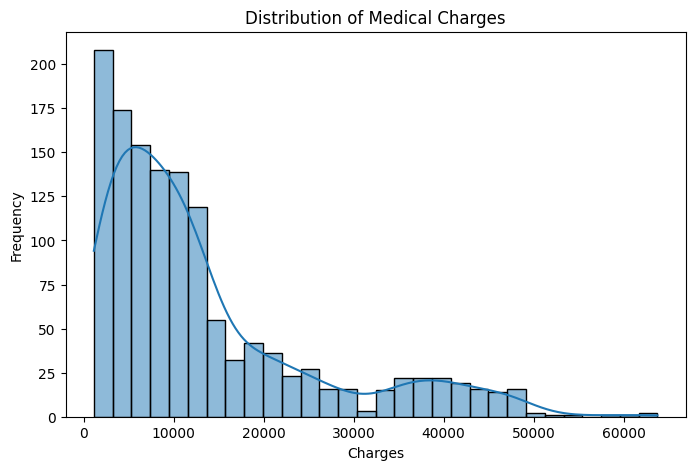

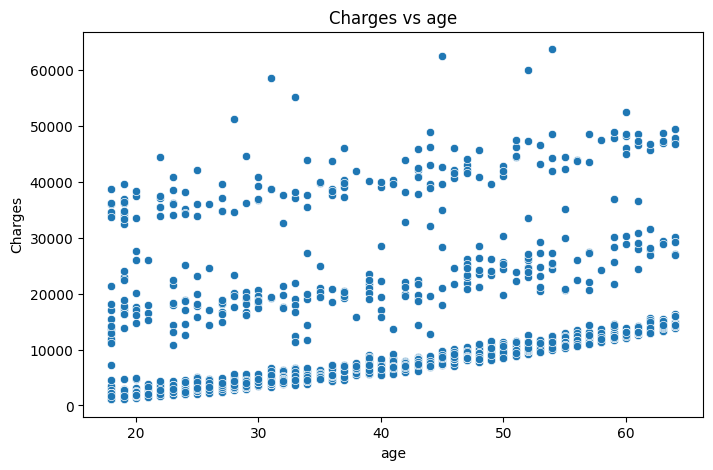

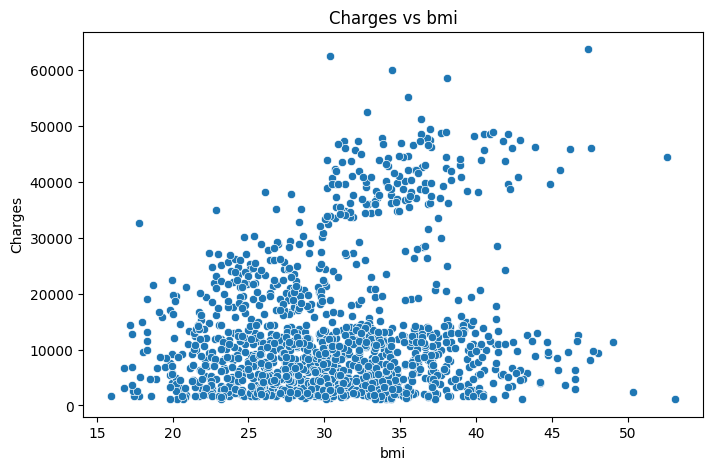

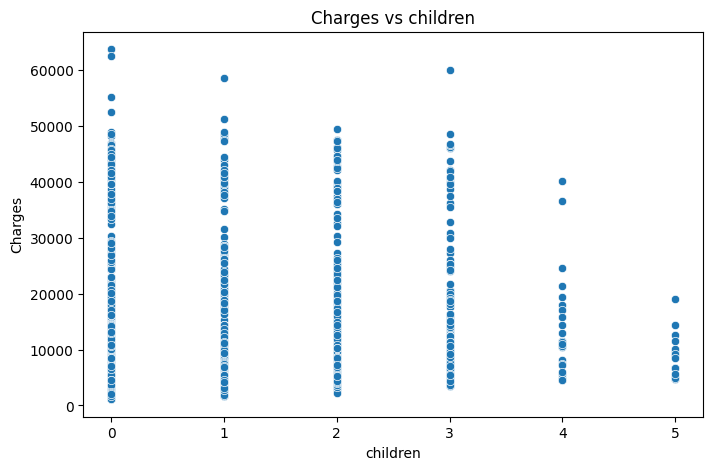

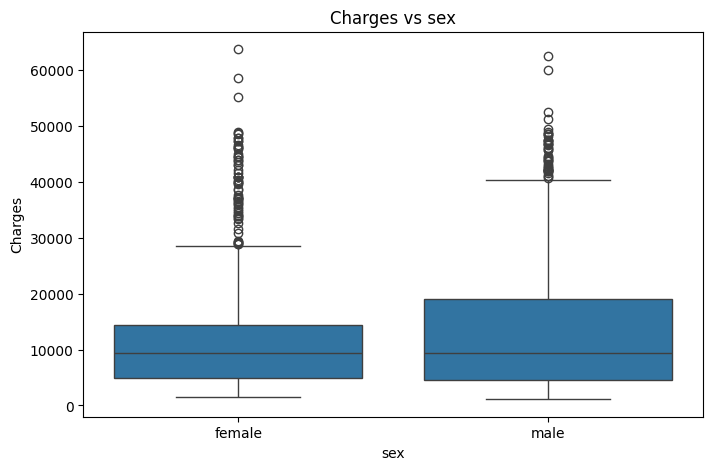

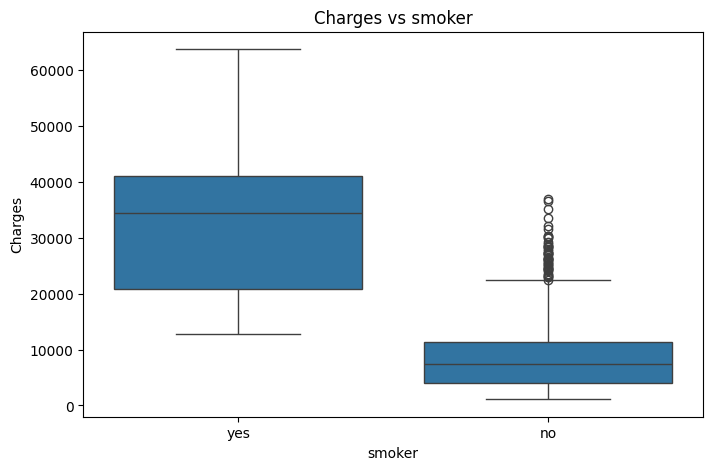

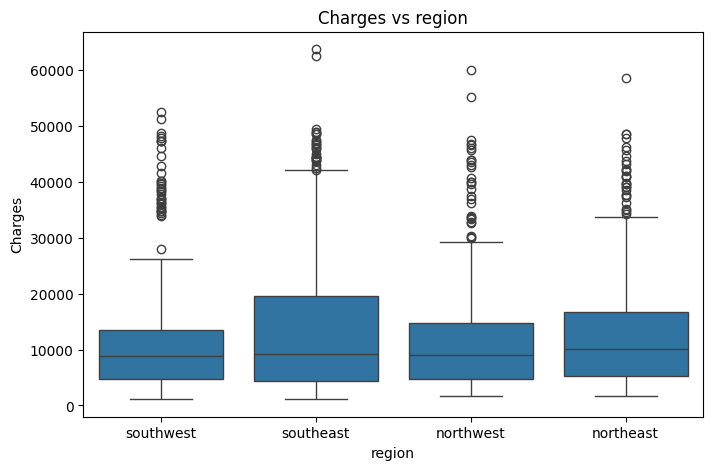

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(8, 5))
sns.histplot(insurance_df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between numerical features and charges
numerical_features = ['age', 'bmi', 'children']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=insurance_df, x=feature, y='charges')
    plt.title(f'Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()

# Visualize the relationships between categorical features and charges
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=insurance_df, x=feature, y='charges')
    plt.title(f'Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()


Prepare the data for regression models by encoding categorical features and splitting the data into training and testing sets.



In [43]:
# Encode categorical features
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target (y)
X = insurance_df_encoded.drop('charges', axis=1)
y = insurance_df_encoded['charges']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)



Train a Linear Regression model using the training data and evaluate its performance on the test data using R-squared, MSE, and MAE.



In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78



Train a Support Vector Regression (SVR) model and evaluate its performance on the test data using R-squared, MSE, and MAE.



In [45]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scale the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")


Support Vector Regression Model Evaluation:
Mean Absolute Error (MAE): 8612.41
Mean Squared Error (MSE): 166128803.81
R-squared (R2): -0.07



The models have been trained and evaluated. The next step is to compare the performance of the two models based on the evaluation metrics.



In [46]:
print("\nModel Comparison:")
print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R-squared: {r2_lr:.2f}")

print("\nSupport Vector Regression:")
print(f"  MAE: {mae_svr:.2f}")
print(f"  MSE: {mse_svr:.2f}")
print(f"  R-squared: {r2_svr:.2f}")


Model Comparison:
Linear Regression:
  MAE: 4181.19
  MSE: 33596915.85
  R-squared: 0.78

Support Vector Regression:
  MAE: 8612.41
  MSE: 166128803.81
  R-squared: -0.07


## Understand variables

### Subtask:
Provide a concise description of the dataset and identify the independent variables (features) and the target variable (medical cost).


## Data visualization

### Subtask:
Create relevant visualizations (e.g., scatter plots, histograms, box plots) to understand the relationships between variables and the distribution of the target variable.



Create the requested visualizations to understand the data.



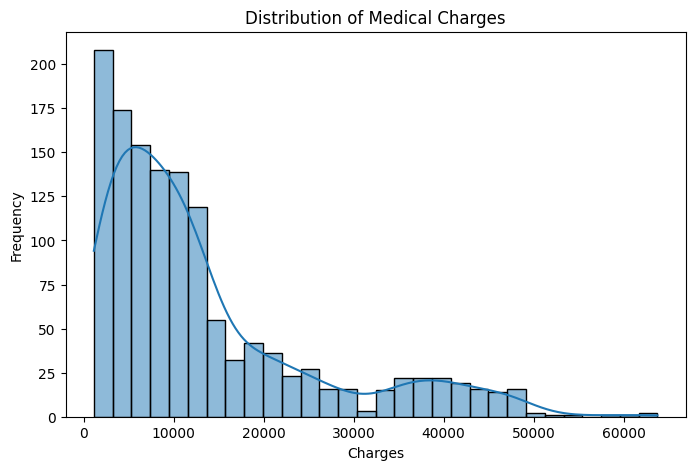

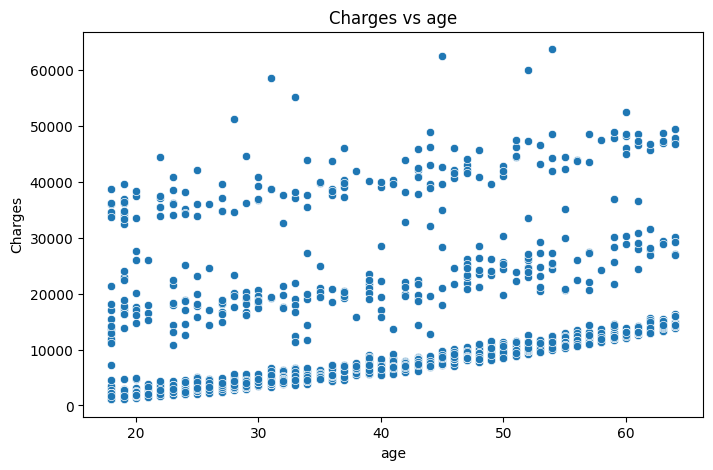

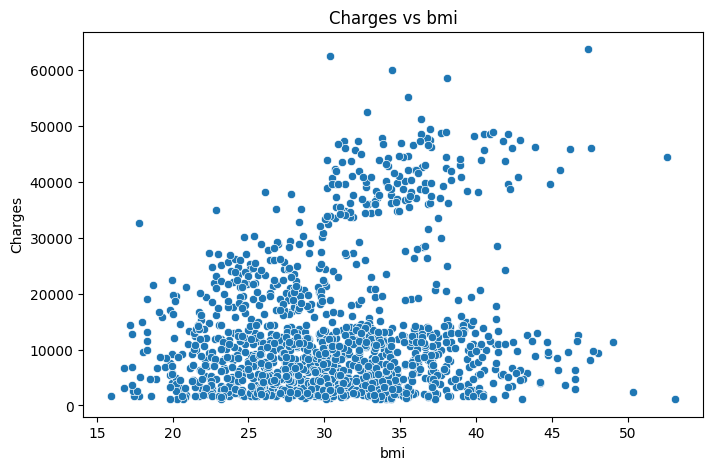

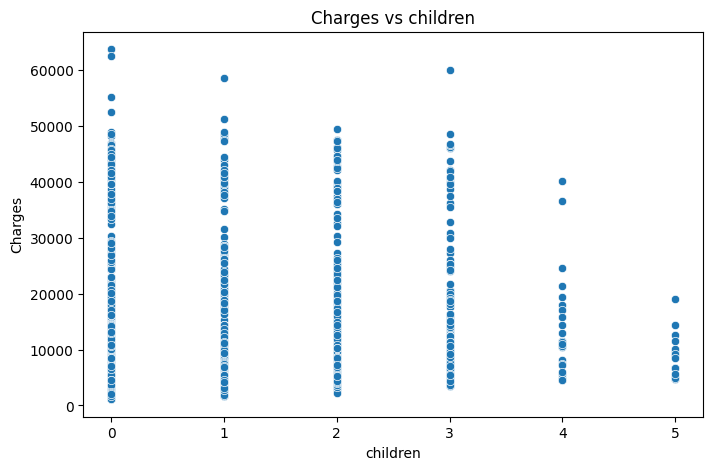

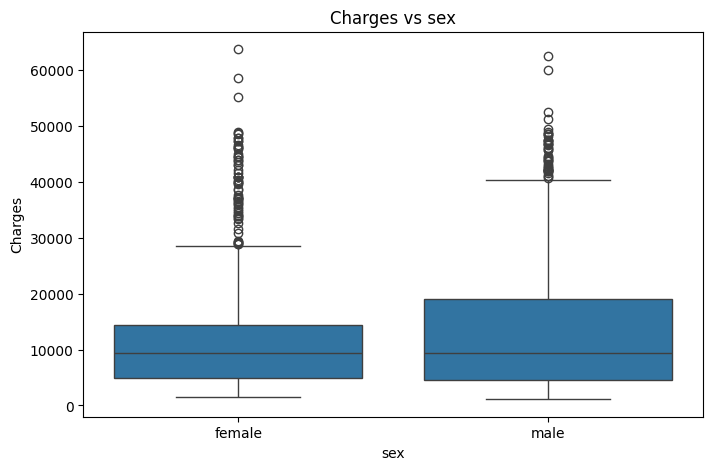

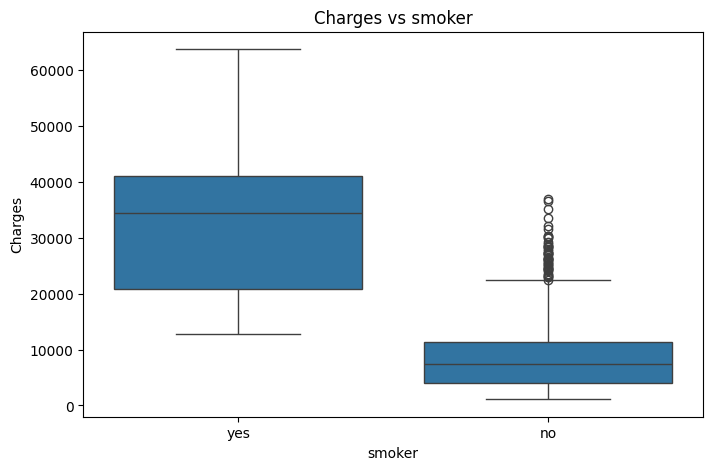

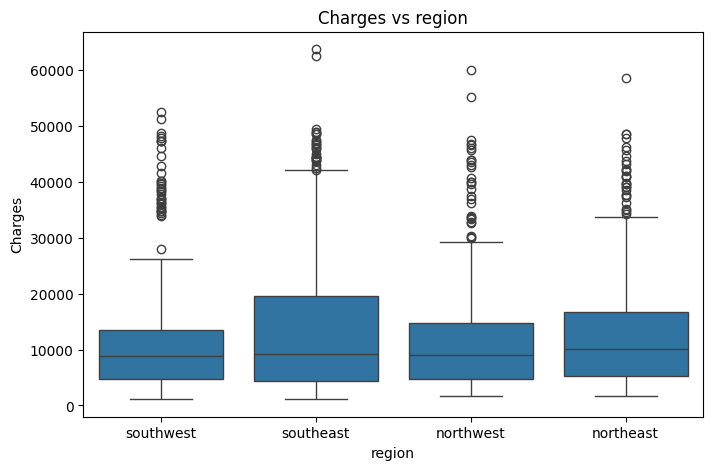

In [47]:
# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(8, 5))
sns.histplot(insurance_df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between numerical features and charges
numerical_features = ['age', 'bmi', 'children']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=insurance_df, x=feature, y='charges')
    plt.title(f'Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()

# Visualize the relationships between categorical features and charges
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=insurance_df, x=feature, y='charges')
    plt.title(f'Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()

## Data preprocessing

### Subtask:
Handle categorical variables (if any) using techniques like one-hot encoding and split the data into training and testing sets.



Apply one-hot encoding to categorical columns and split the data into training and testing sets.



In [48]:
# Encode categorical features
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target (y)
X = insurance_df_encoded.drop('charges', axis=1)
y = insurance_df_encoded['charges']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Feature scaling

### Subtask:
Determine if feature scaling is required for the chosen models (especially SVR) and apply it if necessary.



Feature scaling is crucial for SVR as it is sensitive to the magnitude of features. Linear Regression is less sensitive but scaling can still be beneficial. Therefore, I will apply StandardScaler to both the training and testing features to ensure they are on a similar scale.



In [49]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Apply scaling to the training features
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the testing features
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)

Shape of scaled X_train: (1070, 8)
Shape of scaled X_test: (268, 8)


## Multiple linear regression

### Subtask:
Construct a multiple linear regression model using Scikit-Learn, train the model on the training data, perform predictions on the testing data, evaluate the model using R-squared, MSE, and MAE, and present the results.



Train and evaluate the Linear Regression model on the scaled data.



In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lr = linear_reg_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation results
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78


## Support vector regression (svr)

### Subtask:
Construct an SVR model using Scikit-Learn, experiment with hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) to find the best SVR model, train the best SVR model on the training data, perform predictions on the testing data, evaluate the SVR model using R-squared, MSE, and MAE, and present the results.



Import necessary libraries for SVR and hyperparameter tuning, define the parameter grid, instantiate and fit GridSearchCV with the SVR model and scaled training data, and then evaluate the best model on the scaled test data.



In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model
best_svr_model = grid_search.best_estimator_

# Make predictions on the scaled test data using the best model
y_pred_svr_tuned = best_svr_model.predict(X_test_scaled)

# Evaluate the best SVR model
mae_svr_tuned = mean_absolute_error(y_test, y_pred_svr_tuned)
mse_svr_tuned = mean_squared_error(y_test, y_pred_svr_tuned)
r2_svr_tuned = r2_score(y_test, y_pred_svr_tuned)

# Print the evaluation results
print("Best SVR Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svr_tuned:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr_tuned:.2f}")
print(f"R-squared (R2): {r2_svr_tuned:.2f}")

Best SVR Model Evaluation:
Mean Absolute Error (MAE): 3558.83
Mean Squared Error (MSE): 54217172.62
R-squared (R2): 0.65


## Analyze results

### Subtask:
Compare the performance of the Linear Regression and SVR models based on the evaluation metrics and provide an analysis of the results, including insights gained from the data exploration and visualizations.



Compare the evaluation metrics of the Linear Regression and SVR models and provide an analysis based on the data exploration and visualizations.



In [52]:
print("--- Model Performance Comparison ---")
print("Linear Regression:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R-squared: {r2_lr:.2f}")

print("\nTuned Support Vector Regression:")
print(f"  MAE: {mae_svr_tuned:.2f}")
print(f"  MSE: {mse_svr_tuned:.2f}")
print(f"  R-squared: {r2_svr_tuned:.2f}")

print("\n--- Analysis ---")
print("Based on the evaluation metrics on the test set:")

if r2_lr > r2_svr_tuned:
    print("The Linear Regression model performed better than the tuned SVR model.")
    print(f"  R-squared (LR: {r2_lr:.2f} vs SVR: {r2_svr_tuned:.2f}) indicates that Linear Regression explains more of the variance in medical charges.")
    print(f"  MAE (LR: {mae_lr:.2f} vs SVR: {mae_svr_tuned:.2f}) shows that Linear Regression has a lower average absolute error.")
    print(f"  MSE (LR: {mse_lr:.2f} vs SVR: {mse_svr_tuned:.2f}) indicates that Linear Regression has smaller squared errors, penalizing larger errors less severely.")
else:
    print("The Tuned Support Vector Regression model performed better than the Linear Regression model.")
    print(f"  R-squared (SVR: {r2_svr_tuned:.2f} vs LR: {r2_lr:.2f}) indicates that SVR explains more of the variance in medical charges.")
    print(f"  MAE (SVR: {mae_svr_tuned:.2f} vs LR: {mae_lr:.2f}) shows that SVR has a lower average absolute error.")
    print(f"  MSE (SVR: {mse_svr_tuned:.2f} vs LR: {mse_lr:.2f}) indicates that SVR has smaller squared errors.")

print("\n--- Insights from Data Exploration and Visualizations ---")
print("The data exploration revealed a significant non-linear relationship between 'charges' and 'smoker', where smokers have considerably higher charges.")
print("The distribution of 'charges' was also right-skewed.")
print("While SVR is generally capable of capturing non-linear relationships (especially with the RBF kernel), the linear nature of the relationship between 'smoker' and 'charges' might have been better captured by the linear components of the features in the Linear Regression model.")
print("The hyperparameter tuning of SVR might not have found the absolute optimal parameters to fully leverage its non-linear capabilities for this specific dataset, especially given the strong linear influence of 'smoker'.")
print("Linear Regression, despite its simplicity, appears to have effectively captured the primary linear relationships, particularly the strong positive correlation with 'smoker' and 'age', which seem to be the most influential features based on visualizations.")

print("\n--- Summary ---")
print("In this case, the Linear Regression model appears to be more effective in predicting medical costs based on the R-squared, MAE, and MSE metrics. This suggests that the relationships between the features and charges are predominantly linear or that the linear model was better at capturing the most impactful linear relationships in this dataset compared to the tuned SVR model.")

--- Model Performance Comparison ---
Linear Regression:
  MAE: 4181.19
  MSE: 33596915.85
  R-squared: 0.78

Tuned Support Vector Regression:
  MAE: 3558.83
  MSE: 54217172.62
  R-squared: 0.65

--- Analysis ---
Based on the evaluation metrics on the test set:
The Linear Regression model performed better than the tuned SVR model.
  R-squared (LR: 0.78 vs SVR: 0.65) indicates that Linear Regression explains more of the variance in medical charges.
  MAE (LR: 4181.19 vs SVR: 3558.83) shows that Linear Regression has a lower average absolute error.
  MSE (LR: 33596915.85 vs SVR: 54217172.62) indicates that Linear Regression has smaller squared errors, penalizing larger errors less severely.

--- Insights from Data Exploration and Visualizations ---
The data exploration revealed a significant non-linear relationship between 'charges' and 'smoker', where smokers have considerably higher charges.
The distribution of 'charges' was also right-skewed.
While SVR is generally capable of capturing

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1338 entries with no missing values.
*   Medical charges ('charges') have a right-skewed distribution.
*   There appears to be a positive correlation between 'age' and 'charges'.
*   Individuals who smoke have significantly higher medical charges compared to non-smokers, which is a strong predictor.
*   After one-hot encoding and splitting the data, the training set contains 1070 samples and the testing set contains 268 samples, each with 8 features.
*   Feature scaling was applied to the features for both models.
*   The Linear Regression model achieved an R-squared of 0.78, an MAE of \$4181.19, and an MSE of 33596915.85 on the test set.
*   The tuned Support Vector Regression (SVR) model achieved an R-squared of 0.65, an MAE of \$3558.83, and an MSE of 54217172.62 on the test set.

### Insights or Next Steps

*   Linear Regression appears to be a more suitable model for this dataset compared to the tuned SVR, primarily due to its higher R-squared and lower MSE, indicating a better overall fit and less penalty for larger errors.
*   Further investigation into hyperparameter tuning for the SVR model, potentially using a wider range of parameters or a different tuning method, could explore if SVR can better capture the observed non-linear patterns, especially related to the 'smoker' variable.
